In [158]:
import csv
import pandas as pd

input_file = "../data/raw/listings_detailed.csv"
output_file = "../data/processed/listings_fixed.csv"

rows = []

# Step 1: Read raw CSV safely
with open(input_file, "r", encoding="utf-8", errors="replace") as f:
    reader = csv.reader(f)
    for row in reader:
        rows.append(row)

# Step 2: Detect the correct number of columns (based on header)
expected_cols = len(rows[0])
print(f"Expected columns: {expected_cols}")

# Step 3: Fix rows with wrong number of columns
fixed_rows = []
for i, row in enumerate(rows):
    if len(row) != expected_cols:
        print(f"Fixing row {i+1}: had {len(row)} columns")
        if len(row) < expected_cols:
            # Pad missing columns
            row += [""] * (expected_cols - len(row))
        else:
            # Merge extra columns into the last one
            row = row[:expected_cols-1] + [",".join(row[expected_cols-1:])]
    fixed_rows.append(row)

# Step 4: Save fixed CSV
with open(output_file, "w", newline="", encoding="utf-8") as f:
    writer = csv.writer(f)
    writer.writerows(fixed_rows)

# Step 5: Load into pandas
data = pd.read_csv(output_file)
print("DataFrame shape:", data.shape)


Expected columns: 75
DataFrame shape: (42931, 75)


C:\Users\USER\AppData\Local\Temp\ipykernel_12700\1952502628.py:38: DtypeWarning: Columns (68) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(output_file)


In [159]:
data.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [160]:
data.head()

id                                      listing_url  \
0  801749842377802394  https://www.airbnb.com/rooms/801749842377802394   
1  765948794133787266  https://www.airbnb.com/rooms/765948794133787266   
2  636274456676328779  https://www.airbnb.com/rooms/636274456676328779   
3  768125251187660469  https://www.airbnb.com/rooms/768125251187660469   
4            49248255            https://www.airbnb.com/rooms/49248255   

        scrape_id last_scraped       source  \
0  20230306014634   2023-03-06  city scrape   
1  20230306014634   2023-03-06  city scrape   
2  20230306014634   2023-03-06  city scrape   
3  20230306014634   2023-03-06  city scrape   
4  20230306014634   2023-03-06  city scrape   

                                        name  \
0                      A home away from home   
1                            Brooklyn Refuge   
2                              Villa Masino.   
3  1-Bedroom Private Room with King Size Bed   
4  Get the best of both worlds in Riverdale!   

                                         description  \
0  The whole group will be comfortable in this sp...   
1    Take a break and unwind at this peaceful oasis.   
2  Close to beach   Peaceful walk to park & beach...   
3  Private room with king size bedroom near Sheep...   
4  Welcome to the greatest location if you desire...   

                               neighborhood_overview  \
0                                                NaN   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4  You will find within walking distance the Metr...   

                                         picture_url    host_id  \
0  https://a0.muscache.com/pictures/miso/Hosting-...  495455523   
1  https://a0.muscache.com/pictures/miso/Hosting-...  488760226   
2  https://a0.muscache.com/pictures/miso/Hosting-...  461263600   
3  https://a0.muscache.com/pictures/miso/Hosting-...  475699129   
4  https://a0.muscache.com/pictures/e8e13cf7-44e9...  397288055   

                                      host_url  host_name  host_since  \
0  https://www.airbnb.com/users/show/495455523    Michael  2023-01-10   
1  https://www.airbnb.com/users/show/488760226       Eric  2022-11-22   
2  https://www.airbnb.com/users/show/461263600    Tommaso  2022-05-27   
3  https://www.airbnb.com/users/show/475699129    Suliman  2022-08-18   
4  https://www.airbnb.com/users/show/397288055  Katherine  2021-04-16   

  host_location host_about host_response_time host_response_rate  \
0           NaN        NaN                NaN                NaN   
1           NaN        NaN     within an hour               100%   
2           NaN        NaN                NaN                NaN   
3           NaN        NaN     within an hour                99%   
4           NaN        NaN     within an hour                75%   

  host_acceptance_rate host_is_superhost  \
0                  NaN                 f   
1                 100%                 f   
2                  NaN                 f   
3                  98%                 t   
4                  68%                 f   

                                  host_thumbnail_url  \
0  https://a0.muscache.com/im/pictures/user/773ed...   
1  https://a0.muscache.com/im/pictures/user/87e00...   
2  https://a0.muscache.com/defaults/user_pic-50x5...   
3  https://a0.muscache.com/im/pictures/user/df58a...   
4  https://a0.muscache.com/im/pictures/user/e70f8...   

                                    host_picture_url host_neighbourhood  \
0  https://a0.muscache.com/im/pictures/user/773ed...           Canarsie   
1  https://a0.muscache.com/im/pictures/user/87e00...           Canarsie   
2  https://a0.muscache.com/defaults/user_pic-225x...        Tottenville   
3  https://a0.muscache.com/im/pictures/user/df58a...     Brighton Beach   
4  https://a0.muscache.com/im/pictures/user/e70f8...    North Riverdale   

   host_listings_count  

In [161]:
data.isna().sum().reset_index()

index      0
0                                             id      0
1                                    listing_url      0
2                                      scrape_id      0
3                                   last_scraped      0
4                                         source      0
5                                           name     12
6                                    description    753
7                          neighborhood_overview  18061
8                                    picture_url      0
9                                        host_id      0
10                                      host_url      0
11                                     host_name      5
12                                    host_since      5
13                                 host_location   9086
14                                    host_about  19672
15                            host_response_time  14532
16                            host_response_rate  14532
17                          host_acceptance_rate  12564
18                             host_is_superhost     25
19                            host_thumbnail_url      5
20                              host_picture_url      5
21                            host_neighbourhood   8650
22                           host_listings_count      5
23                     host_total_listings_count      5
24                            host_verifications      5
25                          host_has_profile_pic      5
26                        host_identity_verified      5
27                                 neighbourhood  18060
28                        neighbourhood_cleansed      0
29                  neighbourhood_group_cleansed      0
30                                      latitude      0
31                                     longitude      0
32                                 property_type      0
33                                     room_type      0
34                                  accommodates      0
35                                     bathrooms  42931
36                                bathrooms_text     75
37                                      bedrooms   3874
38                                          beds    929
39                                     amenities      0
40                                         price      0
41                                minimum_nights      0
42                                maximum_nights      0
43                        minimum_minimum_nights     14
44                        maximum_minimum_nights     14
45                        minimum_maximum_nights     14
46                        maximum_maximum_nights     14
47                        minimum_nights_avg_ntm     14
48                        maximum_nights_avg_ntm     14
49                              calendar_updated  42931
50                              has_availability      0
51                               availability_30      0
52                               availability_60      0
53                               availability_90      0
54                              availability_365      0
55                         calendar_last_scraped      0
56                             number_of_reviews      0
57                         number_of_reviews_ltm      0
58                        number_of_reviews_l30d      0
59                                  first_review  10304
60                                   last_review  10304
61                          review_scores_rating  10304
62                        review_scores_accuracy  10739
63                     review_scores_cleanliness  10729
64                         review_scores_checkin  10743
65                   review_scores_communication  10734
66                        review_scores_location  10746
67                           review_scores_value  10746
68                                       license  42930
69                              instant_bookable      0
70                calculated_host_listings_count      0
71   calcul

In [162]:
pd.set_option('display.max_rows', None)  
pd.set_option('display.max_columns', None)
data.isna().sum().to_csv("../data/processed/missing_summary.csv")

In [163]:
data.price
data['price'] = data['price'].replace('[\$,]', '', regex = True).astype(float)

<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\$'
C:\Users\USER\AppData\Local\Temp\ipykernel_12700\4287303707.py:2: SyntaxWarning: invalid escape sequence '\$'
  data['price'] = data['price'].replace('[\$,]', '', regex = True).astype(float)


In [164]:
data.price

0          143.0
1           30.0
2          157.0
3           89.0
4          125.0
5           63.0
6           82.0
7          118.0
8           49.0
9          115.0
10         975.0
11         179.0
12         172.0
13          68.0
14         100.0
15         380.0
16         175.0
17          60.0
18         301.0
19         109.0
20          41.0
21         105.0
22          40.0
23          80.0
24          90.0
25          60.0
26          85.0
27          99.0
28         216.0
29         150.0
30         280.0
31         143.0
32         156.0
33         152.0
34         128.0
35          55.0
36         225.0
37          50.0
38          70.0
39          45.0
40         188.0
41          28.0
42          46.0
43         175.0
44          56.0
45          55.0
46         101.0
47         215.0
48         289.0
49         380.0
50          50.0
51          99.0
52         199.0
53         151.0
54          35.0
55          26.0
56         109.0
57         133.0
58          89

In [165]:
Q1 = data["price"].quantile(0.25)   
Q3 = data["price"].quantile(0.75)   
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# outliers = data[(data["price"] < lower_bound) | (data["price"] > upper_bound)]
data = data[(data['price'] >= lower_bound) & (data['price'] <= upper_bound)]
# print("Outliers found:", len(outliers))



In [166]:
import numpy as np

# data["price_capped"] = data["price"].clip(lower=lower_bound, upper=upper_bound)

# import numpy as np
# data["price_log"] = np.log1p(data["price_capped"])
data["price_log"] = np.log1p(data["price"])

In [167]:
data.head()

id                                      listing_url  \
0  801749842377802394  https://www.airbnb.com/rooms/801749842377802394   
1  765948794133787266  https://www.airbnb.com/rooms/765948794133787266   
2  636274456676328779  https://www.airbnb.com/rooms/636274456676328779   
3  768125251187660469  https://www.airbnb.com/rooms/768125251187660469   
4            49248255            https://www.airbnb.com/rooms/49248255   

        scrape_id last_scraped       source  \
0  20230306014634   2023-03-06  city scrape   
1  20230306014634   2023-03-06  city scrape   
2  20230306014634   2023-03-06  city scrape   
3  20230306014634   2023-03-06  city scrape   
4  20230306014634   2023-03-06  city scrape   

                                        name  \
0                      A home away from home   
1                            Brooklyn Refuge   
2                              Villa Masino.   
3  1-Bedroom Private Room with King Size Bed   
4  Get the best of both worlds in Riverdale!   

                                         description  \
0  The whole group will be comfortable in this sp...   
1    Take a break and unwind at this peaceful oasis.   
2  Close to beach   Peaceful walk to park & beach...   
3  Private room with king size bedroom near Sheep...   
4  Welcome to the greatest location if you desire...   

                               neighborhood_overview  \
0                                                NaN   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4  You will find within walking distance the Metr...   

                                         picture_url    host_id  \
0  https://a0.muscache.com/pictures/miso/Hosting-...  495455523   
1  https://a0.muscache.com/pictures/miso/Hosting-...  488760226   
2  https://a0.muscache.com/pictures/miso/Hosting-...  461263600   
3  https://a0.muscache.com/pictures/miso/Hosting-...  475699129   
4  https://a0.muscache.com/pictures/e8e13cf7-44e9...  397288055   

                                      host_url  host_name  host_since  \
0  https://www.airbnb.com/users/show/495455523    Michael  2023-01-10   
1  https://www.airbnb.com/users/show/488760226       Eric  2022-11-22   
2  https://www.airbnb.com/users/show/461263600    Tommaso  2022-05-27   
3  https://www.airbnb.com/users/show/475699129    Suliman  2022-08-18   
4  https://www.airbnb.com/users/show/397288055  Katherine  2021-04-16   

  host_location host_about host_response_time host_response_rate  \
0           NaN        NaN                NaN                NaN   
1           NaN        NaN     within an hour               100%   
2           NaN        NaN                NaN                NaN   
3           NaN        NaN     within an hour                99%   
4           NaN        NaN     within an hour                75%   

  host_acceptance_rate host_is_superhost  \
0                  NaN                 f   
1                 100%                 f   
2                  NaN                 f   
3                  98%                 t   
4                  68%                 f   

                                  host_thumbnail_url  \
0  https://a0.muscache.com/im/pictures/user/773ed...   
1  https://a0.muscache.com/im/pictures/user/87e00...   
2  https://a0.muscache.com/defaults/user_pic-50x5...   
3  https://a0.muscache.com/im/pictures/user/df58a...   
4  https://a0.muscache.com/im/pictures/user/e70f8...   

                                    host_picture_url host_neighbourhood  \
0  https://a0.muscache.com/im/pictures/user/773ed...           Canarsie   
1  https://a0.muscache.com/im/pictures/user/87e00...           Canarsie   
2  https://a0.muscache.com/defaults/user_pic-225x...        Tottenville   
3  https://a0.muscache.com/im/pictures/user/df58a...     Brighton Beach   
4  https://a0.muscache.com/im/pictures/user/e70f8...    North Riverdale   

   host_listings_count  

In [168]:
drop_cols = ['id','listing_url','scrape_id','name','description',
             'picture_url','license',
             'host_url','host_thumbnail_url','host_picture_url']

data = data.drop(columns=drop_cols, errors='ignore')

In [169]:
data.shape

(39638, 66)

In [170]:
for col in ['host_response_rate','host_acceptance_rate']:
    data[col] = data[col].replace('%','', regex=True).replace('Unknown', 0).astype(float)


In [171]:
num_cols = data.select_dtypes(include=['float64','int64']).columns
data[num_cols] = data[num_cols].fillna(data[num_cols].median())

cat_cols = data.select_dtypes(include='object').columns
data[cat_cols] = data[cat_cols].fillna("Unknown")


In [172]:
cat_cols = data.select_dtypes(include='object').columns
data[cat_cols] = data[cat_cols].fillna("Unknown")


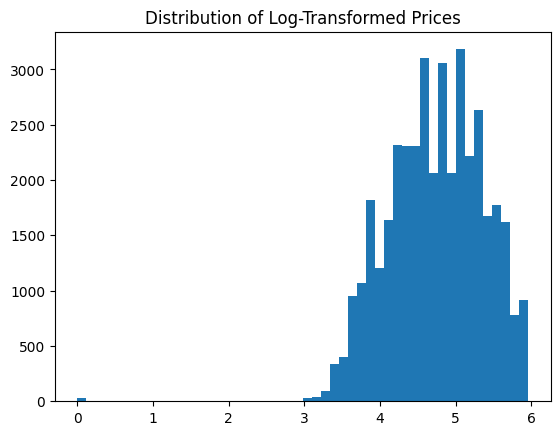

In [173]:
import matplotlib.pyplot as plt
plt.hist(data["price_log"], bins=50)
plt.title("Distribution of Log-Transformed Prices")
plt.show()


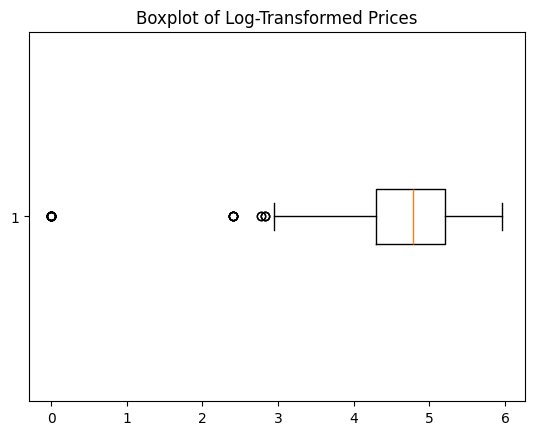

In [174]:
import matplotlib.pyplot as plt
plt.boxplot(data["price_log"], vert=False)
plt.title("Boxplot of Log-Transformed Prices")
plt.show()


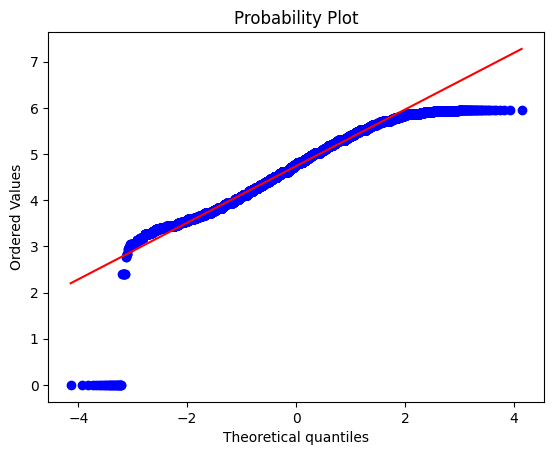

In [175]:
import scipy.stats as stats
stats.probplot(data["price_log"], dist="norm", plot=plt)
plt.show()


In [176]:
# Percentile-based winsorization
lower_cap = data["price"].quantile(0.01)
upper_cap = data["price"].quantile(0.99)

data["price_capped"] = data["price"].clip(lower=lower_cap, upper=upper_cap)
data["price_log"] = np.log1p(data["price_capped"])


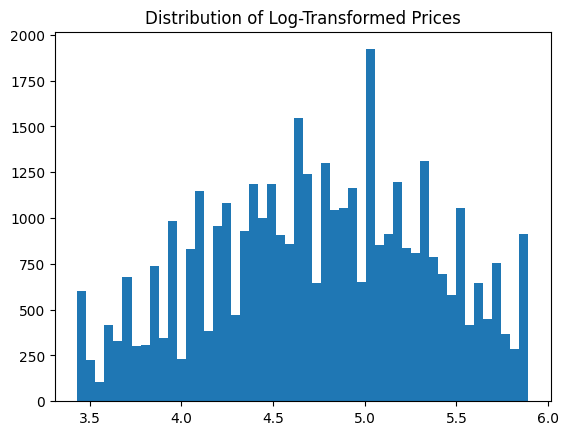

In [177]:
import matplotlib.pyplot as plt
plt.hist(data["price_log"], bins=50)
plt.title("Distribution of Log-Transformed Prices")
plt.show()

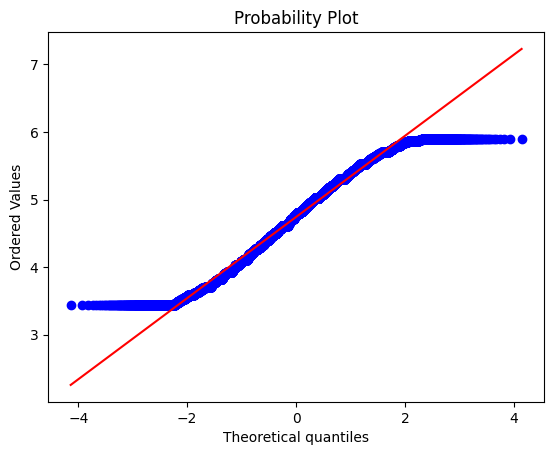

In [178]:
import scipy.stats as stats
stats.probplot(data["price_log"], dist="norm", plot=plt)
plt.show()

<Axes: xlabel='price_log', ylabel='Count'>

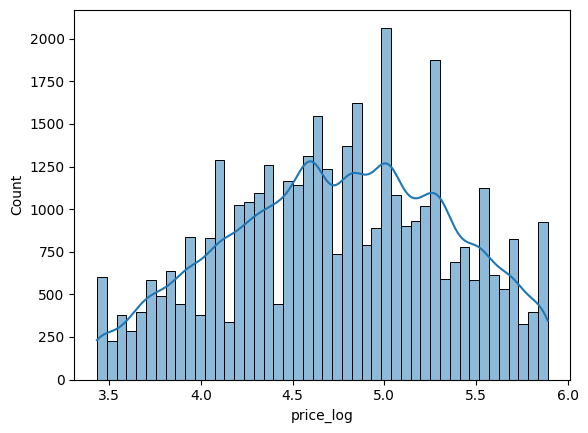

In [179]:
import seaborn as sns
sns.histplot(data["price_log"], kde=True)


In [180]:
data.head()

last_scraped       source  \
0   2023-03-06  city scrape   
1   2023-03-06  city scrape   
2   2023-03-06  city scrape   
3   2023-03-06  city scrape   
4   2023-03-06  city scrape   

                               neighborhood_overview    host_id  host_name  \
0                                            Unknown  495455523    Michael   
1                                            Unknown  488760226       Eric   
2                                            Unknown  461263600    Tommaso   
3                                            Unknown  475699129    Suliman   
4  You will find within walking distance the Metr...  397288055  Katherine   

   host_since host_location host_about host_response_time  host_response_rate  \
0  2023-01-10       Unknown    Unknown            Unknown               100.0   
1  2022-11-22       Unknown    Unknown     within an hour               100.0   
2  2022-05-27       Unknown    Unknown            Unknown               100.0   
3  2022-08-18       Unknown    Unknown     within an hour                99.0   
4  2021-04-16       Unknown    Unknown     within an hour                75.0   

   host_acceptance_rate host_is_superhost host_neighbourhood  \
0                  96.0                 f           Canarsie   
1                 100.0                 f           Canarsie   
2                  96.0                 f        Tottenville   
3                  98.0                 t     Brighton Beach   
4                  68.0                 f    North Riverdale   

   host_listings_count  host_total_listings_count  host_verifications  \
0                  1.0                        1.0  ['email', 'phone']   
1                  2.0                        5.0  ['email', 'phone']   
2                  1.0                        1.0  ['email', 'phone']   
3                  7.0                        7.0  ['email', 'phone']   
4                  1.0                        2.0           ['phone']   

  host_has_profile_pic host_identity_verified  \
0                    t                      f   
1                    t                      t   
2                    f                      f   
3                    t                      t   
4                    t                      t   

                        neighbourhood neighbourhood_cleansed  \
0                             Unknown               Canarsie   
1                             Unknown               Canarsie   
2                             Unknown            Tottenville   
3                             Unknown         Sheepshead Bay   
4  The Bronx, New York, United States        North Riverdale   

  neighbourhood_group_cleansed   latitude  longitude  \
0                     Brooklyn  40.640403 -73.888535   
1                     Brooklyn  40.648510 -73.894330   
2                Staten Island  40.507114 -74.251907   
3                     Brooklyn  40.583490 -73.959880   
4                        Bronx  40.903260 -73.907090   

                 property_type        room_type  accommodates  bathrooms  \
0         Private room in home     Private room             2        NaN   
1  Private room in rental unit     Private room             1        NaN   
2                 Entire villa  Entire home/apt             6        NaN   
3         Private room in home     Private room             2        NaN   
4           Entire rental unit  Entire home/apt             3        NaN   

  bathrooms_text  bedrooms  beds  \
0         1 bath       1.0   1.0   
1  1 shared bath       1.0   1.0   
2        2 baths       2.0   2.0   
3        2 baths       3.0   1.0   
4         1 bath       2.0   2.0   

                                           amenities  price  minimum_nights  \
0  ["50\" TV", "Bathtub", "Microwave", "Free driv...  143.0               2   
1  ["Free parking on premises", "Carbon monoxide ...   30.0               2   
2  ["BBQ grill", "Security cameras on property", ...  157.0               1   
3  ["Security cameras on pro

In [181]:
data.to_csv(r"C:\Users\USER\Desktop\FDM-MiniProject\Air_bnb_Price_prediction\data\processed\new.csv", index=False)


In [182]:
data['host_since'] = pd.to_datetime(data['host_since'], errors='coerce')
data['host_days'] = (pd.to_datetime("today") - data['host_since']).dt.days.fillna(0)

data['last_review'] = pd.to_datetime(data['last_review'], errors='coerce')
data['days_since_last_review'] = (pd.to_datetime("today") - data['last_review']).dt.days.fillna(9999)


C:\Users\USER\AppData\Local\Temp\ipykernel_12700\4293312149.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['last_review'] = pd.to_datetime(data['last_review'], errors='coerce')


In [183]:
data.to_csv(r"C:\Users\USER\Desktop\FDM-MiniProject\Air_bnb_Price_prediction\data\processed\new.csv", index=False)


In [184]:
data.host_acceptance_rate

0         96.0
1        100.0
2         96.0
3         98.0
4         68.0
5         99.0
6         96.0
7         50.0
8         63.0
9         29.0
11       100.0
12       100.0
13       100.0
14        96.0
15       100.0
16       100.0
17       100.0
18        96.0
19        58.0
20         0.0
21       100.0
22        50.0
23        89.0
24        85.0
25        86.0
26       100.0
27       100.0
28        99.0
29        96.0
30        96.0
31       100.0
32        96.0
33        96.0
34        99.0
35        96.0
36        89.0
37        64.0
38       100.0
39       100.0
40        96.0
41        88.0
42        67.0
43       100.0
44        97.0
45       100.0
46        50.0
47       100.0
48        96.0
49        92.0
50        92.0
51        96.0
52        94.0
53       100.0
54         9.0
55         9.0
56        96.0
57        57.0
58       100.0
59        93.0
60        96.0
62        90.0
63        96.0
64        98.0
65        94.0
66       100.0
67        94.0
68       1

In [185]:
import pandas as pd

# Example: assuming your dataframe is df and has a column "amenities"
# Step 1: Handle missing values
data['amenities'] = data['amenities'].fillna("")

# Step 2: Count total number of amenities
data['amenities_count'] = data['amenities'].apply(lambda x: len(x.split(',')) if isinstance(x, str) else 0)

# Step 3: Find most frequent amenities (you can change top_n)
top_n = 15  # choose how many you want
all_amenities = data['amenities'].str.split(',').explode().str.strip()
top_amenities = all_amenities.value_counts().head(top_n).index

# Step 4: Create binary columns for top amenities (safe version)
for a in top_amenities:
    col_name = 'has_' + a.replace(" ", "_").replace("-", "_").replace("/", "_").lower()
    data[col_name] = data['amenities'].str.contains(a, case=False, regex=False).fillna(False).astype(int)

# ✅ Done! Now you have both:
# - data['amenities_count'] (total number of amenities)
# - Columns like data['has_wifi'], data['has_pool'], etc.


In [186]:
data.columns

Index(['last_scraped', 'source', 'neighborhood_overview', 'host_id',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'calendar_la

In [187]:
data.head(2)

last_scraped       source neighborhood_overview    host_id host_name  \
0   2023-03-06  city scrape               Unknown  495455523   Michael   
1   2023-03-06  city scrape               Unknown  488760226      Eric   

  host_since host_location host_about host_response_time  host_response_rate  \
0 2023-01-10       Unknown    Unknown            Unknown               100.0   
1 2022-11-22       Unknown    Unknown     within an hour               100.0   

   host_acceptance_rate host_is_superhost host_neighbourhood  \
0                  96.0                 f           Canarsie   
1                 100.0                 f           Canarsie   

   host_listings_count  host_total_listings_count  host_verifications  \
0                  1.0                        1.0  ['email', 'phone']   
1                  2.0                        5.0  ['email', 'phone']   

  host_has_profile_pic host_identity_verified neighbourhood  \
0                    t                      f       Unknown   
1                    t                      t       Unknown   

  neighbourhood_cleansed neighbourhood_group_cleansed   latitude  longitude  \
0               Canarsie                     Brooklyn  40.640403 -73.888535   
1               Canarsie                     Brooklyn  40.648510 -73.894330   

                 property_type     room_type  accommodates  bathrooms  \
0         Private room in home  Private room             2        NaN   
1  Private room in rental unit  Private room             1        NaN   

  bathrooms_text  bedrooms  beds  \
0         1 bath       1.0   1.0   
1  1 shared bath       1.0   1.0   

                                           amenities  price  minimum_nights  \
0  ["50\" TV", "Bathtub", "Microwave", "Free driv...  143.0               2   
1  ["Free parking on premises", "Carbon monoxide ...   30.0               2   

   maximum_nights  minimum_minimum_nights  maximum_minimum_nights  \
0              30                     2.0                     2.0   
1            1125                     2.0                     2.0   

   minimum_maximum_nights  maximum_maximum_nights  minimum_nights_avg_ntm  \
0                    30.0                    30.0                     2.0   
1                  1125.0                  1125.0                     2.0   

   maximum_nights_avg_ntm  calendar_updated has_availability  availability_30  \
0                    30.0               NaN                t               30   
1                  1125.0               NaN                t               15   

   availability_60  availability_90  availability_365 calendar_last_scraped  \
0               60               90               364            2023-03-06   
1               19               38                41            2023-03-06   

   number_of_reviews  number_of_reviews_ltm  number_of_reviews_l30d  \
0                  0                      0                       0   
1                 13                     13                       5   

  first_review last_review  review_scores_rating  review_scores_accuracy  \
0      Unknown         NaT                  4.83                    4.89   
1   2022-12-06  2023-02-19                  4.85                    4.77   

   review_scores_cleanliness  review_scores_checkin  \
0                       4.80                   4.95   
1                       4.77                   4.85   

   review_scores_communication  review_scores_location  review_scores_value  \
0                         4.96                    4.84                 4.77   
1                         4.92                    4.85                 4.92   

  instant_bookable  calculated_host_listings_count  \
0                f                               1   
1                t                               2   

   calculated_host_listings_count_entire_homes  \
0                                            0   
1                                            1   

   calculated_host_listings_count_private_rooms

In [188]:
data = data.drop(columns=['amenities'])

In [189]:
data= data.drop(columns=['last_scraped', 'source','host_id'])

In [190]:
data = data.drop(columns=['host_name', 'host_about'])

In [191]:
num_columns = data.shape[1]
print("Number of columns:", num_columns)

Number of columns: 79


In [192]:
data.calendar_last_scraped

0        2023-03-06
1        2023-03-06
2        2023-03-06
3        2023-03-06
4        2023-03-06
5        2023-03-06
6        2023-03-06
7        2023-03-06
8        2023-03-06
9        2023-03-06
11       2023-03-06
12       2023-03-06
13       2023-03-06
14       2023-03-06
15       2023-03-06
16       2023-03-06
17       2023-03-06
18       2023-03-06
19       2023-03-06
20       2023-03-06
21       2023-03-06
22       2023-03-06
23       2023-03-06
24       2023-03-06
25       2023-03-06
26       2023-03-06
27       2023-03-06
28       2023-03-06
29       2023-03-06
30       2023-03-06
31       2023-03-06
32       2023-03-06
33       2023-03-06
34       2023-03-06
35       2023-03-06
36       2023-03-06
37       2023-03-06
38       2023-03-06
39       2023-03-06
40       2023-03-06
41       2023-03-06
42       2023-03-06
43       2023-03-06
44       2023-03-06
45       2023-03-06
46       2023-03-06
47       2023-03-06
48       2023-03-06
49       2023-03-06
50       2023-03-06


In [193]:
data = data.drop(columns=['calendar_last_scraped'])

In [194]:
data.isna().sum()

neighborhood_overview                               0
host_since                                          5
host_location                                       0
host_response_time                                  0
host_response_rate                                  0
host_acceptance_rate                                0
host_is_superhost                                   0
host_neighbourhood                                  0
host_listings_count                                 0
host_total_listings_count                           0
host_verifications                                  0
host_has_profile_pic                                0
host_identity_verified                              0
neighbourhood                                       0
neighbourhood_cleansed                              0
neighbourhood_group_cleansed                        0
latitude                                            0
longitude                                           0
property_type               

In [195]:
data = data.drop(columns=['bathrooms'])

In [196]:
m = data.isna().sum()

for col, missing in m.items():
    if missing > 0:
        print(f"{col}: {missing}")


host_since: 5
calendar_updated: 39638
last_review: 8811


In [197]:
data = data.drop(columns=['calendar_updated', 'last_review'])

In [198]:
data = data.dropna(subset=['host_since'])


In [199]:
# List of columns to drop

drop_cols = [
    # Price-related (keep only price_log)
    'price',
    'price_capped',

    # Review dates (keep engineered features like days_since_last_review)
    'first_review',
    'last_review',

    # Free-text columns (unless doing NLP)
    'name',
    'summary',
    'description',
    'neighborhood_overview',
    'notes',
    'transit',
    'access',
    'interaction',
    'house_rules'
]

# Drop them if they exist in the dataset
data = data.drop(columns=[c for c in drop_cols if c in data.columns], errors="ignore")

print("Remaining columns:", len(data.columns))
print("Dropped:", [c for c in drop_cols if c not in data.columns])


Remaining columns: 71
Dropped: ['price', 'price_capped', 'first_review', 'last_review', 'name', 'summary', 'description', 'neighborhood_overview', 'notes', 'transit', 'access', 'interaction', 'house_rules']


In [200]:
# Outlier handling for minimum_nights and maximum_nights

# Cap minimum_nights at 30 (anything above becomes 30)
if 'minimum_nights' in data.columns:
    data['minimum_nights'] = data['minimum_nights'].clip(upper=30)

# Cap maximum_nights at 365 (anything above becomes 365)
if 'maximum_nights' in data.columns:
    data['maximum_nights'] = data['maximum_nights'].clip(upper=365)

# If dataset has related min/max/avg columns, cap them too
for col in data.columns:
    if 'minimum_nights' in col.lower():
        data[col] = data[col].clip(upper=30)
    if 'maximum_nights' in col.lower():
        data[col] = data[col].clip(upper=365)


In [201]:
data.head(3)

host_since host_location host_response_time  host_response_rate  \
0 2023-01-10       Unknown            Unknown               100.0   
1 2022-11-22       Unknown     within an hour               100.0   
2 2022-05-27       Unknown            Unknown               100.0   

   host_acceptance_rate host_is_superhost host_neighbourhood  \
0                  96.0                 f           Canarsie   
1                 100.0                 f           Canarsie   
2                  96.0                 f        Tottenville   

   host_listings_count  host_total_listings_count  host_verifications  \
0                  1.0                        1.0  ['email', 'phone']   
1                  2.0                        5.0  ['email', 'phone']   
2                  1.0                        1.0  ['email', 'phone']   

  host_has_profile_pic host_identity_verified neighbourhood  \
0                    t                      f       Unknown   
1                    t                      t       Unknown   
2                    f                      f       Unknown   

  neighbourhood_cleansed neighbourhood_group_cleansed   latitude  longitude  \
0               Canarsie                     Brooklyn  40.640403 -73.888535   
1               Canarsie                     Brooklyn  40.648510 -73.894330   
2            Tottenville                Staten Island  40.507114 -74.251907   

                 property_type        room_type  accommodates bathrooms_text  \
0         Private room in home     Private room             2         1 bath   
1  Private room in rental unit     Private room             1  1 shared bath   
2                 Entire villa  Entire home/apt             6        2 baths   

   bedrooms  beds  minimum_nights  maximum_nights  minimum_minimum_nights  \
0       1.0   1.0               2              30                     2.0   
1       1.0   1.0               2             365                     2.0   
2       2.0   2.0               1             365                     1.0   

   maximum_minimum_nights  minimum_maximum_nights  maximum_maximum_nights  \
0                     2.0                    30.0                    30.0   
1                     2.0                   365.0                   365.0   
2                     1.0                   365.0                   365.0   

   minimum_nights_avg_ntm  maximum_nights_avg_ntm has_availability  \
0                     2.0                    30.0                t   
1                     2.0                   365.0                t   
2                     1.0                   365.0                t   

   availability_30  availability_60  availability_90  availability_365  \
0               30               60               90               364   
1               15               19               38                41   
2               30               60               90               364   

   number_of_reviews  number_of_reviews_ltm  number_of_reviews_l30d  \
0                  0                      0                       0   
1                 13                     13                       5   
2                  0                      0                       0   

   review_scores_rating  review_scores_accuracy  review_scores_cleanliness  \
0                  4.83                    4.89                       4.80   
1                  4.85                    4.77                       4.77   
2                  4.83                    4.89                       4.80   

   review_scores_checkin  review_scores_communication  review_scores_location  \
0                   4.95                         4.96                    4.84   
1                   4.85                         4.92                    4.85   
2                   4.95                         4.96                    4.84   

   review_scores_value instant_bookable  calculated_host_listings_count  \
0                 4.77                f                               1   
1              

In [202]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# -----------------------------
# 1. Define categorical columns
# -----------------------------
categorical_low = [
    'host_response_time', 'host_is_superhost', 'host_verifications',
    'host_has_profile_pic', 'host_identity_verified',
    'neighbourhood_group_cleansed', 'room_type',
    'has_availability', 'instant_bookable'
]

categorical_high = [
    'host_location', 'host_neighbourhood', 'neighbourhood',
    'neighbourhood_cleansed', 'property_type', 'bathrooms_text'
]

# -----------------------------
# 2. Identify numeric columns
# -----------------------------
numeric_cols = data.select_dtypes(include=[np.number]).columns.tolist()

# Detect binary flags (only 0/1 values)
binary_flags = [col for col in numeric_cols if set(data[col].dropna().unique()) <= {0,1}]

# Continuous numeric = numeric but not binary
continuous_nums = [col for col in numeric_cols if col not in binary_flags]

print("Binary flags:", binary_flags[:10])
print("Continuous numeric:", continuous_nums[:10])

# -----------------------------
# 3. Label Encode high-cardinality categoricals
# -----------------------------
label_encoders = {}
for col in categorical_high:
    le = LabelEncoder()
    data[col] = data[col].astype(str).fillna("Unknown")
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# -----------------------------
# 4. Build preprocessing pipeline
# -----------------------------
preprocessor = ColumnTransformer(
    transformers=[
        # Continuous numeric: impute + scale
        ("num", Pipeline([
            ("imputer", SimpleImputer(strategy="median")),
            ("scaler", StandardScaler())
        ]), continuous_nums),

        # Binary flags: keep as is
        ("binary", "passthrough", binary_flags),

        # Low-cardinality categoricals: OneHotEncode
        ("low_cat", OneHotEncoder(handle_unknown="ignore"), categorical_low),

        # High-cardinality categoricals: already label encoded
        ("high_cat", "passthrough", categorical_high)
    ]
)


Binary flags: ['has_"wifi"', 'has_"smoke_alarm"', 'has_"kitchen"', 'has_"carbon_monoxide_alarm"', 'has_["hangers"', 'has_"essentials"', 'has_"heating"', 'has_"hair_dryer"', 'has_"dishes_and_silverware"', 'has_"shampoo"']
Continuous numeric: ['host_response_rate', 'host_acceptance_rate', 'host_listings_count', 'host_total_listings_count', 'latitude', 'longitude', 'accommodates', 'bedrooms', 'beds', 'minimum_nights']


In [203]:
data.head(3)

host_since  host_location host_response_time  host_response_rate  \
0 2023-01-10            978            Unknown               100.0   
1 2022-11-22            978     within an hour               100.0   
2 2022-05-27            978            Unknown               100.0   

   host_acceptance_rate host_is_superhost  host_neighbourhood  \
0                  96.0                 f                  55   
1                 100.0                 f                  55   
2                  96.0                 f                 450   

   host_listings_count  host_total_listings_count  host_verifications  \
0                  1.0                        1.0  ['email', 'phone']   
1                  2.0                        5.0  ['email', 'phone']   
2                  1.0                        1.0  ['email', 'phone']   

  host_has_profile_pic host_identity_verified  neighbourhood  \
0                    t                      f            164   
1                    t                      t            164   
2                    f                      f            164   

   neighbourhood_cleansed neighbourhood_group_cleansed   latitude  longitude  \
0                      29                     Brooklyn  40.640403 -73.888535   
1                      29                     Brooklyn  40.648510 -73.894330   
2                     196                Staten Island  40.507114 -74.251907   

   property_type        room_type  accommodates  bathrooms_text  bedrooms  \
0             38     Private room             2               2       1.0   
1             44     Private room             1               4       1.0   
2             19  Entire home/apt             6               7       2.0   

   beds  minimum_nights  maximum_nights  minimum_minimum_nights  \
0   1.0               2              30                     2.0   
1   1.0               2             365                     2.0   
2   2.0               1             365                     1.0   

   maximum_minimum_nights  minimum_maximum_nights  maximum_maximum_nights  \
0                     2.0                    30.0                    30.0   
1                     2.0                   365.0                   365.0   
2                     1.0                   365.0                   365.0   

   minimum_nights_avg_ntm  maximum_nights_avg_ntm has_availability  \
0                     2.0                    30.0                t   
1                     2.0                   365.0                t   
2                     1.0                   365.0                t   

   availability_30  availability_60  availability_90  availability_365  \
0               30               60               90               364   
1               15               19               38                41   
2               30               60               90               364   

   number_of_reviews  number_of_reviews_ltm  number_of_reviews_l30d  \
0                  0                      0                       0   
1                 13                     13                       5   
2                  0                      0                       0   

   review_scores_rating  review_scores_accuracy  review_scores_cleanliness  \
0                  4.83                    4.89                       4.80   
1                  4.85                    4.77                       4.77   
2                  4.83                    4.89                       4.80   

   review_scores_checkin  review_scores_communication  review_scores_location  \
0                   4.95                         4.96                    4.84   
1                   4.85                         4.92                    4.85   
2                   4.95                         4.96                    4.84   

   review_scores_value instant_bookable  calculated_host_listings_count  \
0                 4.77                f                               1   
1                 4.92                t            

In [204]:
# Inspect all unique values in each column
for col in data.columns:
    unique_vals = data[col].dropna().unique()
    print(f"{col}: {unique_vals[:20]}")


host_since: <DatetimeArray>
['2023-01-10 00:00:00', '2022-11-22 00:00:00', '2022-05-27 00:00:00',
 '2022-08-18 00:00:00', '2021-04-16 00:00:00', '2019-01-26 00:00:00',
 '2021-10-10 00:00:00', '2016-06-12 00:00:00', '2015-12-15 00:00:00',
 '2014-09-17 00:00:00', '2022-11-07 00:00:00', '2022-09-11 00:00:00',
 '2018-03-22 00:00:00', '2019-03-03 00:00:00', '2020-12-18 00:00:00',
 '2021-07-17 00:00:00', '2019-06-01 00:00:00', '2019-10-14 00:00:00',
 '2019-05-28 00:00:00', '2017-10-17 00:00:00']
Length: 20, dtype: datetime64[ns]
host_location: [ 978  644  977 1011  645   38 1044 1051  758  610  121  944  586  114
  198  239  146  387  762  126]
host_response_time: ['Unknown' 'within an hour' 'a few days or more' 'within a few hours'
 'within a day']
host_response_rate: [100.  99.  75.   0.  86.  74.  63.  83.  89.  73.  90.  56.  98.  96.
  50.  67.  97.  92.  29.  94.]
host_acceptance_rate: [ 96. 100.  98.  68.  99.  50.  63.  29.  58.   0.  89.  85.  86.  64.
  88.  67.  97.  92.  94.   9.

In [205]:
import pandas as pd
import numpy as np

# Function to detect t/f columns allowing unknowns
def detect_tf_columns_with_unknown(df, unknown_vals=['Unknown']):
    tf_cols = []
    for col in df.columns:
        col_vals = df[col].dropna().astype(str).str.strip().str.lower()
        # Exclude unknown values
        col_vals = col_vals[~col_vals.isin([val.lower() for val in unknown_vals])]
        if col_vals.isin(['t','f']).all():
            tf_cols.append(col)
    return tf_cols

# Detect t/f columns
tf_cols = detect_tf_columns_with_unknown(data)
print("t/f columns found:", tf_cols)

# Convert t/f to binary, set unknowns to NaN
for col in tf_cols:
    data[col] = data[col].astype(str).str.strip().str.lower().replace({'unknown': np.nan}).map({'t':1,'f':0}).astype(float)

# Preview results
print(data[tf_cols].head())


t/f columns found: ['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'has_availability', 'instant_bookable']
   host_is_superhost  host_has_profile_pic  host_identity_verified  \
0                0.0                   1.0                     0.0   
1                0.0                   1.0                     1.0   
2                0.0                   0.0                     0.0   
3                1.0                   1.0                     1.0   
4                0.0                   1.0                     1.0   

   has_availability  instant_bookable  
0               1.0               0.0  
1               1.0               1.0  
2               1.0               0.0  
3               1.0               1.0  
4               1.0               0.0  


In [206]:
import ast

# First, convert string to list
data['host_verifications_list'] = data['host_verifications'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else [])

# Define all possible verifications in the dataset
all_verifications = set(v for lst in data['host_verifications_list'] for v in lst)

# Create binary columns
for v in all_verifications:
    data[f'verified_{v}'] = data['host_verifications_list'].apply(lambda lst: 1 if v in lst else 0)


In [207]:
data = data.drop(columns=['host_verifications_list', 'host_verifications'])

In [208]:
import pandas as pd

# Convert 'host_since' to datetime
data['host_since'] = pd.to_datetime(data['host_since'], errors='coerce')

# Feature 1: Host tenure in years
data['host_tenure_years'] = (pd.Timestamp.now() - data['host_since']).dt.days / 365

# Feature 2 (optional): Host tenure in months
data['host_tenure_months'] = (pd.Timestamp.now() - data['host_since']).dt.days // 30

# Feature 3 (optional): Extract year and month separately
data['host_since_year'] = data['host_since'].dt.year
data['host_since_month'] = data['host_since'].dt.month

# Drop the original 'host_since' column
data = data.drop(columns=['host_since'])

# Preview the new features
print(data[['host_tenure_years', 'host_tenure_months', 'host_since_year', 'host_since_month']].head())


   host_tenure_years  host_tenure_months  host_since_year  host_since_month
0           2.731507                  33             2023                 1
1           2.865753                  34             2022                11
2           3.356164                  40             2022                 5
3           3.128767                  38             2022                 8
4           4.468493                  54             2021                 4


In [209]:
data.head(3)

host_location host_response_time  host_response_rate  host_acceptance_rate  \
0            978            Unknown               100.0                  96.0   
1            978     within an hour               100.0                 100.0   
2            978            Unknown               100.0                  96.0   

   host_is_superhost  host_neighbourhood  host_listings_count  \
0                0.0                  55                  1.0   
1                0.0                  55                  2.0   
2                0.0                 450                  1.0   

   host_total_listings_count  host_has_profile_pic  host_identity_verified  \
0                        1.0                   1.0                     0.0   
1                        5.0                   1.0                     1.0   
2                        1.0                   0.0                     0.0   

   neighbourhood  neighbourhood_cleansed neighbourhood_group_cleansed  \
0            164                      29                     Brooklyn   
1            164                      29                     Brooklyn   
2            164                     196                Staten Island   

    latitude  longitude  property_type        room_type  accommodates  \
0  40.640403 -73.888535             38     Private room             2   
1  40.648510 -73.894330             44     Private room             1   
2  40.507114 -74.251907             19  Entire home/apt             6   

   bathrooms_text  bedrooms  beds  minimum_nights  maximum_nights  \
0               2       1.0   1.0               2              30   
1               4       1.0   1.0               2             365   
2               7       2.0   2.0               1             365   

   minimum_minimum_nights  maximum_minimum_nights  minimum_maximum_nights  \
0                     2.0                     2.0                    30.0   
1                     2.0                     2.0                   365.0   
2                     1.0                     1.0                   365.0   

   maximum_maximum_nights  minimum_nights_avg_ntm  maximum_nights_avg_ntm  \
0                    30.0                     2.0                    30.0   
1                   365.0                     2.0                   365.0   
2                   365.0                     1.0                   365.0   

   has_availability  availability_30  availability_60  availability_90  \
0               1.0               30               60               90   
1               1.0               15               19               38   
2               1.0               30               60               90   

   availability_365  number_of_reviews  number_of_reviews_ltm  \
0               364                  0                      0   
1                41                 13                     13   
2               364                  0                      0   

   number_of_reviews_l30d  review_scores_rating  review_scores_accuracy  \
0                       0                  4.83                    4.89   
1                       5                  4.85                    4.77   
2                       0                  4.83                    4.89   

   review_scores_cleanliness  review_scores_checkin  \
0                       4.80                   4.95   
1                       4.77                   4.85   
2                       4.80                   4.95   

   review_scores_communication  review_scores_location  review_scores_value  \
0                         4.96                    4.84                 4.77   
1                         4.92                    4.85                 4.92   
2                         4.96                    4.84                 4.77   

   instant_bookable  calculated_host_listings_count  \
0               0.0                               1   
1               1.0                               2   
2               0.0                               1   

   ca

In [210]:
import pandas as pd

# One-hot encode neighbourhood_group_cleansed
data = pd.get_dummies(data, columns=['neighbourhood_group_cleansed'], prefix='neighbourhood')

# One-hot encode room_type
data = pd.get_dummies(data, columns=['room_type'], prefix='room')

# Preview the new columns
print(data.head())


   host_location host_response_time  host_response_rate  host_acceptance_rate  \
0            978            Unknown               100.0                  96.0   
1            978     within an hour               100.0                 100.0   
2            978            Unknown               100.0                  96.0   
3            978     within an hour                99.0                  98.0   
4            978     within an hour                75.0                  68.0   

   host_is_superhost  host_neighbourhood  host_listings_count  \
0                0.0                  55                  1.0   
1                0.0                  55                  2.0   
2                0.0                 450                  1.0   
3                1.0                  39                  7.0   
4                0.0                 310                  1.0   

   host_total_listings_count  host_has_profile_pic  host_identity_verified  \
0                        1.0                

In [211]:
data.head(3)

host_location host_response_time  host_response_rate  host_acceptance_rate  \
0            978            Unknown               100.0                  96.0   
1            978     within an hour               100.0                 100.0   
2            978            Unknown               100.0                  96.0   

   host_is_superhost  host_neighbourhood  host_listings_count  \
0                0.0                  55                  1.0   
1                0.0                  55                  2.0   
2                0.0                 450                  1.0   

   host_total_listings_count  host_has_profile_pic  host_identity_verified  \
0                        1.0                   1.0                     0.0   
1                        5.0                   1.0                     1.0   
2                        1.0                   0.0                     0.0   

   neighbourhood  neighbourhood_cleansed   latitude  longitude  property_type  \
0            164                      29  40.640403 -73.888535             38   
1            164                      29  40.648510 -73.894330             44   
2            164                     196  40.507114 -74.251907             19   

   accommodates  bathrooms_text  bedrooms  beds  minimum_nights  \
0             2               2       1.0   1.0               2   
1             1               4       1.0   1.0               2   
2             6               7       2.0   2.0               1   

   maximum_nights  minimum_minimum_nights  maximum_minimum_nights  \
0              30                     2.0                     2.0   
1             365                     2.0                     2.0   
2             365                     1.0                     1.0   

   minimum_maximum_nights  maximum_maximum_nights  minimum_nights_avg_ntm  \
0                    30.0                    30.0                     2.0   
1                   365.0                   365.0                     2.0   
2                   365.0                   365.0                     1.0   

   maximum_nights_avg_ntm  has_availability  availability_30  availability_60  \
0                    30.0               1.0               30               60   
1                   365.0               1.0               15               19   
2                   365.0               1.0               30               60   

   availability_90  availability_365  number_of_reviews  \
0               90               364                  0   
1               38                41                 13   
2               90               364                  0   

   number_of_reviews_ltm  number_of_reviews_l30d  review_scores_rating  \
0                      0                       0                  4.83   
1                     13                       5                  4.85   
2                      0                       0                  4.83   

   review_scores_accuracy  review_scores_cleanliness  review_scores_checkin  \
0                    4.89                       4.80                   4.95   
1                    4.77                       4.77                   4.85   
2                    4.89                       4.80                   4.95   

   review_scores_communication  review_scores_location  review_scores_value  \
0                         4.96                    4.84                 4.77   
1                         4.92                    4.85                 4.92   
2                         4.96                    4.84                 4.77   

   instant_bookable  calculated_host_listings_count  \
0               0.0                               1   
1               1.0                               2   
2               0.0                               1   

   calculated_host_listings_count_entire_homes  \
0                                            0   
1                                            1   
2                                            1   

   calcul

In [212]:
# Select columns that are boolean (True/False)
bool_cols = data.select_dtypes(include='bool').columns

# Convert True → 1, False → 0
data[bool_cols] = data[bool_cols].astype(int)

# Preview results
print(data[bool_cols].head())


   neighbourhood_Bronx  neighbourhood_Brooklyn  neighbourhood_Manhattan  \
0                    0                       1                        0   
1                    0                       1                        0   
2                    0                       0                        0   
3                    0                       1                        0   
4                    1                       0                        0   

   neighbourhood_Queens  neighbourhood_Staten Island  room_Entire home/apt  \
0                     0                            0                     0   
1                     0                            0                     0   
2                     0                            1                     1   
3                     0                            0                     0   
4                     0                            0                     1   

   room_Hotel room  room_Private room  room_Shared room  
0                0    

In [213]:
data.head(3)

host_location host_response_time  host_response_rate  host_acceptance_rate  \
0            978            Unknown               100.0                  96.0   
1            978     within an hour               100.0                 100.0   
2            978            Unknown               100.0                  96.0   

   host_is_superhost  host_neighbourhood  host_listings_count  \
0                0.0                  55                  1.0   
1                0.0                  55                  2.0   
2                0.0                 450                  1.0   

   host_total_listings_count  host_has_profile_pic  host_identity_verified  \
0                        1.0                   1.0                     0.0   
1                        5.0                   1.0                     1.0   
2                        1.0                   0.0                     0.0   

   neighbourhood  neighbourhood_cleansed   latitude  longitude  property_type  \
0            164                      29  40.640403 -73.888535             38   
1            164                      29  40.648510 -73.894330             44   
2            164                     196  40.507114 -74.251907             19   

   accommodates  bathrooms_text  bedrooms  beds  minimum_nights  \
0             2               2       1.0   1.0               2   
1             1               4       1.0   1.0               2   
2             6               7       2.0   2.0               1   

   maximum_nights  minimum_minimum_nights  maximum_minimum_nights  \
0              30                     2.0                     2.0   
1             365                     2.0                     2.0   
2             365                     1.0                     1.0   

   minimum_maximum_nights  maximum_maximum_nights  minimum_nights_avg_ntm  \
0                    30.0                    30.0                     2.0   
1                   365.0                   365.0                     2.0   
2                   365.0                   365.0                     1.0   

   maximum_nights_avg_ntm  has_availability  availability_30  availability_60  \
0                    30.0               1.0               30               60   
1                   365.0               1.0               15               19   
2                   365.0               1.0               30               60   

   availability_90  availability_365  number_of_reviews  \
0               90               364                  0   
1               38                41                 13   
2               90               364                  0   

   number_of_reviews_ltm  number_of_reviews_l30d  review_scores_rating  \
0                      0                       0                  4.83   
1                     13                       5                  4.85   
2                      0                       0                  4.83   

   review_scores_accuracy  review_scores_cleanliness  review_scores_checkin  \
0                    4.89                       4.80                   4.95   
1                    4.77                       4.77                   4.85   
2                    4.89                       4.80                   4.95   

   review_scores_communication  review_scores_location  review_scores_value  \
0                         4.96                    4.84                 4.77   
1                         4.92                    4.85                 4.92   
2                         4.96                    4.84                 4.77   

   instant_bookable  calculated_host_listings_count  \
0               0.0                               1   
1               1.0                               2   
2               0.0                               1   

   calculated_host_listings_count_entire_homes  \
0                                            0   
1                                            1   
2                                            1   

   calcul

In [214]:
data.head(3)

host_location host_response_time  host_response_rate  host_acceptance_rate  \
0            978            Unknown               100.0                  96.0   
1            978     within an hour               100.0                 100.0   
2            978            Unknown               100.0                  96.0   

   host_is_superhost  host_neighbourhood  host_listings_count  \
0                0.0                  55                  1.0   
1                0.0                  55                  2.0   
2                0.0                 450                  1.0   

   host_total_listings_count  host_has_profile_pic  host_identity_verified  \
0                        1.0                   1.0                     0.0   
1                        5.0                   1.0                     1.0   
2                        1.0                   0.0                     0.0   

   neighbourhood  neighbourhood_cleansed   latitude  longitude  property_type  \
0            164                      29  40.640403 -73.888535             38   
1            164                      29  40.648510 -73.894330             44   
2            164                     196  40.507114 -74.251907             19   

   accommodates  bathrooms_text  bedrooms  beds  minimum_nights  \
0             2               2       1.0   1.0               2   
1             1               4       1.0   1.0               2   
2             6               7       2.0   2.0               1   

   maximum_nights  minimum_minimum_nights  maximum_minimum_nights  \
0              30                     2.0                     2.0   
1             365                     2.0                     2.0   
2             365                     1.0                     1.0   

   minimum_maximum_nights  maximum_maximum_nights  minimum_nights_avg_ntm  \
0                    30.0                    30.0                     2.0   
1                   365.0                   365.0                     2.0   
2                   365.0                   365.0                     1.0   

   maximum_nights_avg_ntm  has_availability  availability_30  availability_60  \
0                    30.0               1.0               30               60   
1                   365.0               1.0               15               19   
2                   365.0               1.0               30               60   

   availability_90  availability_365  number_of_reviews  \
0               90               364                  0   
1               38                41                 13   
2               90               364                  0   

   number_of_reviews_ltm  number_of_reviews_l30d  review_scores_rating  \
0                      0                       0                  4.83   
1                     13                       5                  4.85   
2                      0                       0                  4.83   

   review_scores_accuracy  review_scores_cleanliness  review_scores_checkin  \
0                    4.89                       4.80                   4.95   
1                    4.77                       4.77                   4.85   
2                    4.89                       4.80                   4.95   

   review_scores_communication  review_scores_location  review_scores_value  \
0                         4.96                    4.84                 4.77   
1                         4.92                    4.85                 4.92   
2                         4.96                    4.84                 4.77   

   instant_bookable  calculated_host_listings_count  \
0               0.0                               1   
1               1.0                               2   
2               0.0                               1   

   calculated_host_listings_count_entire_homes  \
0                                            0   
1                                            1   
2                                            1   

   calcul

In [215]:
data.host_response_time

0                   Unknown
1            within an hour
2                   Unknown
3            within an hour
4            within an hour
5            within an hour
6        a few days or more
7        a few days or more
8        within a few hours
9            within an hour
11           within an hour
12           within an hour
13                  Unknown
14                  Unknown
15           within an hour
16           within an hour
17           within an hour
18       a few days or more
19           within an hour
20             within a day
21       within a few hours
22       within a few hours
23       within a few hours
24       within a few hours
25           within an hour
26           within an hour
27                  Unknown
28           within an hour
29                  Unknown
30                  Unknown
31       within a few hours
32           within an hour
33             within a day
34           within an hour
35       within a few hours
36       within a fe

In [216]:
import pandas as pd

# One-hot encode 'host_response_time'
host_response_dummies = pd.get_dummies(data['host_response_time'], 
                                       prefix='host_response', 
                                       dummy_na=True)  # dummy_na=True will create a column for missing values

# Concatenate back to the original dataframe
data = pd.concat([data, host_response_dummies], axis=1)

# Optional: drop the original column
data = data.drop('host_response_time', axis=1)


In [217]:
data.head(3)

host_location  host_response_rate  host_acceptance_rate  host_is_superhost  \
0            978               100.0                  96.0                0.0   
1            978               100.0                 100.0                0.0   
2            978               100.0                  96.0                0.0   

   host_neighbourhood  host_listings_count  host_total_listings_count  \
0                  55                  1.0                        1.0   
1                  55                  2.0                        5.0   
2                 450                  1.0                        1.0   

   host_has_profile_pic  host_identity_verified  neighbourhood  \
0                   1.0                     0.0            164   
1                   1.0                     1.0            164   
2                   0.0                     0.0            164   

   neighbourhood_cleansed   latitude  longitude  property_type  accommodates  \
0                      29  40.640403 -73.888535             38             2   
1                      29  40.648510 -73.894330             44             1   
2                     196  40.507114 -74.251907             19             6   

   bathrooms_text  bedrooms  beds  minimum_nights  maximum_nights  \
0               2       1.0   1.0               2              30   
1               4       1.0   1.0               2             365   
2               7       2.0   2.0               1             365   

   minimum_minimum_nights  maximum_minimum_nights  minimum_maximum_nights  \
0                     2.0                     2.0                    30.0   
1                     2.0                     2.0                   365.0   
2                     1.0                     1.0                   365.0   

   maximum_maximum_nights  minimum_nights_avg_ntm  maximum_nights_avg_ntm  \
0                    30.0                     2.0                    30.0   
1                   365.0                     2.0                   365.0   
2                   365.0                     1.0                   365.0   

   has_availability  availability_30  availability_60  availability_90  \
0               1.0               30               60               90   
1               1.0               15               19               38   
2               1.0               30               60               90   

   availability_365  number_of_reviews  number_of_reviews_ltm  \
0               364                  0                      0   
1                41                 13                     13   
2               364                  0                      0   

   number_of_reviews_l30d  review_scores_rating  review_scores_accuracy  \
0                       0                  4.83                    4.89   
1                       5                  4.85                    4.77   
2                       0                  4.83                    4.89   

   review_scores_cleanliness  review_scores_checkin  \
0                       4.80                   4.95   
1                       4.77                   4.85   
2                       4.80                   4.95   

   review_scores_communication  review_scores_location  review_scores_value  \
0                         4.96                    4.84                 4.77   
1                         4.92                    4.85                 4.92   
2                         4.96                    4.84                 4.77   

   instant_bookable  calculated_host_listings_count  \
0               0.0                               1   
1               1.0                               2   
2               0.0                               1   

   calculated_host_listings_count_entire_homes  \
0                                            0   
1                                            1   
2                                            1   

   calculated_host_listings_count_private_rooms  \
0                                 

In [218]:
# Assuming your one-hot columns start with 'host_response_'
one_hot_cols = [col for col in data.columns if col.startswith('host_response_')]

# Convert bool to int
data[one_hot_cols] = data[one_hot_cols].astype(int)


In [219]:
data.head()

host_location  host_response_rate  host_acceptance_rate  host_is_superhost  \
0            978                 100                  96.0                0.0   
1            978                 100                 100.0                0.0   
2            978                 100                  96.0                0.0   
3            978                  99                  98.0                1.0   
4            978                  75                  68.0                0.0   

   host_neighbourhood  host_listings_count  host_total_listings_count  \
0                  55                  1.0                        1.0   
1                  55                  2.0                        5.0   
2                 450                  1.0                        1.0   
3                  39                  7.0                        7.0   
4                 310                  1.0                        2.0   

   host_has_profile_pic  host_identity_verified  neighbourhood  \
0                   1.0                     0.0            164   
1                   1.0                     1.0            164   
2                   0.0                     0.0            164   
3                   1.0                     1.0            164   
4                   1.0                     1.0            162   

   neighbourhood_cleansed   latitude  longitude  property_type  accommodates  \
0                      29  40.640403 -73.888535             38             2   
1                      29  40.648510 -73.894330             44             1   
2                     196  40.507114 -74.251907             19             6   
3                     176  40.583490 -73.959880             38             2   
4                     147  40.903260 -73.907090             15             3   

   bathrooms_text  bedrooms  beds  minimum_nights  maximum_nights  \
0               2       1.0   1.0               2              30   
1               4       1.0   1.0               2             365   
2               7       2.0   2.0               1             365   
3               7       3.0   1.0               1              20   
4               2       2.0   2.0               3              21   

   minimum_minimum_nights  maximum_minimum_nights  minimum_maximum_nights  \
0                     2.0                     2.0                    30.0   
1                     2.0                     2.0                   365.0   
2                     1.0                     1.0                   365.0   
3                     1.0                     1.0                    20.0   
4                     3.0                     3.0                    21.0   

   maximum_maximum_nights  minimum_nights_avg_ntm  maximum_nights_avg_ntm  \
0                    30.0                     2.0                    30.0   
1                   365.0                     2.0                   365.0   
2                   365.0                     1.0                   365.0   
3                    20.0                     1.0                    20.0   
4                    21.0                     3.0                    21.0   

   has_availability  availability_30  availability_60  availability_90  \
0               1.0               30               60               90   
1               1.0               15               19               38   
2               1.0               30               60               90   
3               1.0               30               60               90   
4               1.0                3               17               46   

   availability_365  number_of_reviews  number_of_reviews_ltm  \
0               364                  0                      0   
1                41                 13                     13   
2               364                  0                      0   
3               364                 15                     15   
4                46                 25                     16   

   number_of_reviews_l

In [220]:
data.shape

(39633, 88)

In [221]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Features / target
X = data.drop("price_log", axis=1)
y = data["price_log"]  # log-transform the target

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Initialize and train Random Forest
rf_model = RandomForestRegressor(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)
rf_model.fit(X_train, y_train)

# Predict in log space
y_pred_log = rf_model.predict(X_test)

# Convert predictions back to normal price
y_pred = np.expm1(y_pred_log)        # inverse of log1p
y_true = np.expm1(y_test)            # also invert test labels

# Evaluate
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
r2 = r2_score(y_true, y_pred)

print("Random Forest with log(price):")
print("RMSE:", rmse)
print("R² Score:", r2)


Random Forest with log(price):
RMSE: 44.96587169679788
R² Score: 0.6882401820103322


In [222]:
y_pred

array([103.41171264, 168.74793534, 107.80645989, ..., 113.97224322,
       113.83854595, 114.37768264], shape=(7927,))

In [223]:
y_true

34433     90.0
42025    200.0
17456    129.0
27082    270.0
203      130.0
21866     87.0
640      183.0
8635     254.0
41731     99.0
35284    120.0
2465     100.0
42292    237.0
2831      60.0
15050    150.0
1463      60.0
24988     76.0
3748     110.0
18175    170.0
11701    360.0
19591     99.0
18162     99.0
25335    225.0
885      111.0
22776    219.0
11310     59.0
24671    175.0
32053    100.0
1755      57.0
32520     72.0
33843    120.0
17274    328.0
41525     37.0
35376    249.0
29995     97.0
27428     75.0
4780     300.0
31415    128.0
7400      84.0
28098    100.0
998      112.0
959      116.0
19659     30.0
10127     55.0
29599    199.0
29130    145.0
11240     50.0
2089      58.0
40181    211.0
29592     59.0
13692    100.0
1352      38.0
28068    125.0
30479    105.0
19054    160.0
34098    260.0
17906    159.0
29630     80.0
15944     95.0
32315     53.0
22763     69.0
2765      87.0
40078    100.0
42649    235.0
10050     90.0
23653     32.0
5070      65.0
27944     

In [224]:
data = data.dropna(subset=["host_is_superhost"])

In [225]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline

# -----------------------------
# 1. Define features (X) and target (y)
# -----------------------------
X = data.drop("price_log", axis=1)
y = data["price_log"]  # log-transform the target
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# -----------------------------
# 2. Create full pipeline with preprocessor + Linear Regression
# -----------------------------
model = Pipeline(steps=[
    ("regressor", LinearRegression())
])

# -----------------------------
# 3. Train model
# -----------------------------
model.fit(X_train, y_train)

# -----------------------------
# 4. Predictions & Evaluation
# -----------------------------
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5
r2 = r2_score(y_test, y_pred)

print("Linear Regression Performance:")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.4f}")

Linear Regression Performance:
RMSE: 0.36
R²: 0.6449


In [226]:
print(X.isnull().values.any())


False


In [227]:
# Count NaN values per column
nan_counts = X.isnull().sum()

# Show only columns that actually have NaNs
nan_counts = nan_counts[nan_counts > 0].sort_values(ascending=False)

print("Columns with missing values:\n", nan_counts)


Columns with missing values:
 Series([], dtype: int64)


In [228]:
X = X.dropna(subset=["host_is_superhost"])

In [229]:
data.price_log

0        4.969813
1        3.433987
2        5.062595
3        4.499810
4        4.836282
5        4.158883
6        4.418841
7        4.779123
8        3.912023
9        4.753590
11       5.192957
12       5.153292
13       4.234107
14       4.615121
15       5.891644
16       5.170484
17       4.110874
18       5.710427
19       4.700480
20       3.737670
21       4.663439
22       3.713572
23       4.394449
24       4.510860
25       4.110874
26       4.454347
27       4.605170
28       5.379897
29       5.017280
30       5.638355
31       4.969813
32       5.056246
33       5.030438
34       4.859812
35       4.025352
36       5.420535
37       3.931826
38       4.262680
39       3.828641
40       5.241747
41       3.433987
42       3.850148
43       5.170484
44       4.043051
45       4.025352
46       4.624973
47       5.375278
48       5.669881
49       5.891644
50       3.931826
51       4.605170
52       5.298317
53       5.023881
54       3.583519
55       3.433987
56       4

In [230]:
print(data.columns.tolist())


['host_location', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood', 'neighbourhood_cleansed', 'latitude', 'longitude', 'property_type', 'accommodates', 'bathrooms_text', 'bedrooms', 'beds', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'has_availability', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'instant_bookable', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calcu

In [231]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error

# -------------------------------
# 1. Features and target
# -------------------------------
X = data.drop("price_log", axis=1)
y = data["price_log"]   # log-transform to handle skewed distribution

# -------------------------------
# 2. Train/test split
# -------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# -------------------------------
# 3. Initialize Random Forest
# -------------------------------
rf_model = RandomForestRegressor(
    n_estimators=300,      # more trees for stability
    max_depth=None,        # can limit to reduce overfitting
    min_samples_leaf=3,    # avoid tiny leaves for skewed data
    random_state=42,
    n_jobs=-1
)

# -------------------------------
# 4. Train the model
# -------------------------------
rf_model.fit(X_train, y_train)

# -------------------------------
# 5. Predict log-price
# -------------------------------
y_pred_log = rf_model.predict(X_test)

# -------------------------------
# 6. Convert predictions back to original price
# -------------------------------
y_pred = np.expm1(y_pred_log)
y_true = np.expm1(y_test)

# -------------------------------
# 7. Evaluate model performance
# -------------------------------
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
r2 = r2_score(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
medae = median_absolute_error(y_true, y_pred)

print("Random Forest with log(price):")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.3f}")
print(f"MAE: {mae:.2f}")
print(f"Median AE: {medae:.2f}")


Random Forest with log(price):
RMSE: 45.22
R² Score: 0.687
MAE: 30.19
Median AE: 19.03


In [232]:
# import numpy as np
# from sklearn.model_selection import RandomizedSearchCV
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error

# # -------------------------------
# # 1. Define parameter grid
# # -------------------------------
# param_dist = {
#     "n_estimators": [100, 200, 300, 500],
#     "max_depth": [None, 10, 20, 30, 50],
#     "min_samples_split": [2, 5, 10],
#     "min_samples_leaf": [1, 2, 4, 8],
#     "max_features": ["sqrt", "log2", None]   # removed 'auto'
# }


# # -------------------------------
# # 2. Initialize Random Forest
# # -------------------------------
# rf = RandomForestRegressor(random_state=42, n_jobs=-1)

# # -------------------------------
# # 3. RandomizedSearchCV
# # -------------------------------
# rf_random = RandomizedSearchCV(
#     estimator=rf,
#     param_distributions=param_dist,
#     n_iter=50,                # number of random combinations
#     cv=3,                     # 3-fold cross validation
#     verbose=2,
#     random_state=42,
#     n_jobs=-1,
#     scoring="neg_root_mean_squared_error"  # optimize for RMSE
# )

# # -------------------------------
# # 4. Fit RandomizedSearchCV
# # -------------------------------
# rf_random.fit(X_train, y_train)

# print("Best Parameters:", rf_random.best_params_)

# # -------------------------------
# # 5. Use best model to predict
# # -------------------------------
# best_rf = rf_random.best_estimator_

# y_pred_log = best_rf.predict(X_test)
# y_pred = np.expm1(y_pred_log)   # back to original price
# y_true = np.expm1(y_test)

# # -------------------------------
# # 6. Evaluate tuned model
# # -------------------------------
# rmse = np.sqrt(mean_squared_error(y_true, y_pred))
# r2 = r2_score(y_true, y_pred)
# mae = mean_absolute_error(y_true, y_pred)
# medae = median_absolute_error(y_true, y_pred)

# print("\nTuned Random Forest Results:")
# print(f"RMSE: {rmse:.2f}")
# print(f"R² Score: {r2:.3f}")
# print(f"MAE: {mae:.2f}")
# print(f"Median AE: {medae:.2f}")


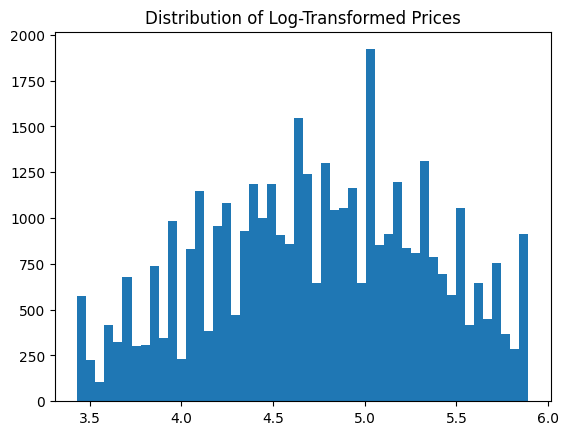

In [233]:
import matplotlib.pyplot as plt
plt.hist(data["price_log"], bins=50)
plt.title("Distribution of Log-Transformed Prices")
plt.show()


In [236]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error
from xgboost import XGBRegressor

# -------------------------------
# 1. Features and target
# -------------------------------
X = data.drop("price_log", axis=1)
y = data["price_log"]   # winsorized + log transformed price

# -------------------------------
# 2. Train/test split
# -------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
# Make safe feature names for XGBoost
X_train = X_train.rename(columns=lambda c: str(c).replace('[','').replace(']','').replace('<',''))
X_test = X_test.rename(columns=lambda c: str(c).replace('[','').replace(']','').replace('<',''))

# -------------------------------
# 3. Initialize XGBoost Regressor
# -------------------------------
xgb_model = XGBRegressor(
    n_estimators=500,      # number of boosting rounds
    learning_rate=0.05,    # step size shrinkage
    max_depth=6,           # tree depth
    subsample=0.8,         # row sampling
    colsample_bytree=0.8,  # feature sampling
    random_state=42,
    n_jobs=-1
)

# -------------------------------
# 4. Train the model
# -------------------------------
xgb_model.fit(X_train, y_train)

# -------------------------------
# 5. Predict log-price
# -------------------------------
y_pred_log = xgb_model.predict(X_test)

# -------------------------------
# 6. Convert predictions back to original price
# -------------------------------
y_pred = np.expm1(y_pred_log)
y_true = np.expm1(y_test)

# -------------------------------
# 7. Evaluate model performance
# -------------------------------
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
r2 = r2_score(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
medae = median_absolute_error(y_true, y_pred)

print("XGBoost with log(price):")
print(f"RMSE: {rmse:.2f}")

print(f"R² Score: {r2:.3f}")
print(f"MAE: {mae:.2f}")
print(f"Median AE: {medae:.2f}")


XGBoost with log(price):
RMSE: 43.21
R² Score: 0.715
MAE: 29.28
Median AE: 19.16


In [237]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

param_dist = {
    'learning_rate': np.linspace(0.01, 0.1, 10),
    'max_depth': [4, 6, 8, 10],
    'n_estimators': [300, 400, 500, 600],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}

rand_search = RandomizedSearchCV(
    estimator=XGBRegressor(random_state=42, n_jobs=-1),
    param_distributions=param_dist,
    n_iter=30,          # 30 random combinations
    scoring='neg_root_mean_squared_error',
    cv=3,
    verbose=2,
    random_state=42
)

rand_search.fit(X_train, y_train)
print("Best Parameters:", rand_search.best_params_)


Fitting 3 folds for each of 30 candidates, totalling 90 fits
[CV] END colsample_bytree=0.7, learning_rate=0.04000000000000001, max_depth=8, n_estimators=300, subsample=0.7; total time=   2.8s
[CV] END colsample_bytree=0.7, learning_rate=0.04000000000000001, max_depth=8, n_estimators=300, subsample=0.7; total time=   2.6s
[CV] END colsample_bytree=0.7, learning_rate=0.04000000000000001, max_depth=8, n_estimators=300, subsample=0.7; total time=   3.1s
[CV] END colsample_bytree=0.8, learning_rate=0.030000000000000006, max_depth=8, n_estimators=400, subsample=0.9; total time=   3.9s
[CV] END colsample_bytree=0.8, learning_rate=0.030000000000000006, max_depth=8, n_estimators=400, subsample=0.9; total time=   3.6s
[CV] END colsample_bytree=0.8, learning_rate=0.030000000000000006, max_depth=8, n_estimators=400, subsample=0.9; total time=   3.3s
[CV] END colsample_bytree=0.8, learning_rate=0.020000000000000004, max_depth=6, n_estimators=500, subsample=0.9; total time=   2.2s
[CV] END colsample

In [238]:
xgb_tuned = XGBRegressor(
    n_estimators=600,
    max_depth=10,
    learning_rate=0.03,
    subsample=0.7,
    colsample_bytree=0.7,
    random_state=42,
    n_jobs=-1
)

xgb_tuned.fit(X_train, y_train)
y_pred_log = xgb_tuned.predict(X_test)
y_pred = np.expm1(y_pred_log)
y_true = np.expm1(y_test)

# Evaluate
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
r2 = r2_score(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
medae = median_absolute_error(y_true, y_pred)

print("Tuned XGBoost Results:")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.3f}")
print(f"MAE: {mae:.2f}")
print(f"Median AE: {medae:.2f}")


Tuned XGBoost Results:
RMSE: 42.51
R² Score: 0.724
MAE: 28.40
Median AE: 18.02
